**EXERCISE 1** Regression Models

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean
# Loading the data into a Pandas DataFrame
data = pd.read_csv('kc_house_data.csv')
 
# Dropping the numerically non-sensical variables
dropColumns = ['id', 'date', 'zipcode']
data = data.drop(dropColumns, axis = 1)
 
# Separating the dependent and independent variables
y = data['price']
X = data.drop('price', axis = 1)
 
# Dividing the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Linear Regression

In [3]:
# Building and fitting the Linear Regression model
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
 
# Evaluating the Linear Regression model
print(linearModel.score(X_test, y_test))

0.6936872351451921


Linear Regression with Statsmodels

In [15]:
from statsmodels.datasets import longley
from statsmodels.formula.api import ols
dta = longley.load_pandas().data
formula = 'TOTEMP ~ GNPDEFL + GNP + UNEMP + ARMED + POP + YEAR'
results = ols(formula, dta).fit()
hypotheses = '(GNPDEFL = GNP), (UNEMP = 2), (YEAR/1829 = 1)'
f_test = results.f_test(hypotheses)
print(f_test)
print(results.params) 
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<F test: F=array([[144.17976065]]), p=6.322026217368697e-08, df_denom=9, df_num=3>
Intercept   -3.482259e+06
GNPDEFL      1.506187e+01
GNP         -3.581918e-02
UNEMP       -2.020230e+00
ARMED       -1.033227e+00
POP         -5.110411e-02
YEAR         1.829151e+03
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           4.98e-10
Time:                        22:27:00   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covarianc

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


Ridge Regression

In [4]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 69.12811921100793
0.5 : 69.12829364673507
0.75 : 69.12844835069453
1.0 : 69.12858352574284
1.25 : 69.12869937241094
1.5 : 69.12879608893492
1.75 : 69.12887387128694
2.0 : 69.128932913205


In [5]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train, y_train)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))

0.6935048120674046


Lasso Regression

In [6]:
# List to maintain the cross-validation scores
cross_val_scores_lasso = []
 
# List to maintain the different values of Lambda
Lambda = []
 
# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 69.12793016115465
0.5 : 69.12793545905849
0.75 : 69.12794073574211
1.0 : 69.12794598329492
1.25 : 69.12795119306774
1.5 : 69.12795637463427
1.75 : 69.12796154974657
2.0 : 69.12796667510615


In [7]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)
 
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test, y_test))

0.6936820128944141


In [8]:
# Building the two lists for visualization
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
scores = [linearModel.score(X_test, y_test),
         ridgeModelChosen.score(X_test, y_test),
         lassoModelChosen.score(X_test, y_test)]
 
# Building the dictionary to compare the scores
mapping = {}
mapping['Linear Regreesion'] = linearModel.score(X_test, y_test)
mapping['Ridge Regreesion'] = ridgeModelChosen.score(X_test, y_test)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test)
 
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

Linear Regreesion : 0.6936872351451921
Ridge Regreesion : 0.6935048120674046
Lasso Regression : 0.6936820128944141


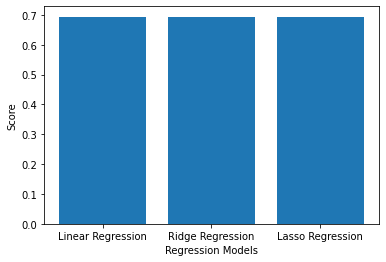

In [9]:
# Plotting the scores
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()

**EXERCISE 2** Ridge Regression

In [1]:
# importing libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
 
# loading boston dataset
boston = load_boston()
X = boston.data[:, :13]
y = boston.target
 
print ("Boston dataset keys : \n", boston.keys())
 
print ("\nBoston data : \n", boston.data)
 
# scaling the inputs
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
 
# Train Test split will be used for both models
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y,
                                                    test_size = 0.3)
 
# training model with 0.5 alpha value
model = Ridge(alpha = 0.5, normalize = False, tol = 0.001, \
              solver ='auto', random_state = 42)
model.fit(X_train, y_train)
 
# predicting the y_test
y_pred = model.predict(X_test)
 
# finding score for our model
score = model.score(X_test, y_test)
print("\n\nModel score : ", score)

Boston dataset keys : 
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Boston data : 
 [[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


Model score :  0.7483685474290457


**EXERCISE 3** Variance v. Bias

In [10]:
!pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 8.2 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [13]:
import mlxtend
from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import LogisticRegression
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split
 
# Get Data Set
X, y = iris_data()
X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify=y)
 
# Define Algorithm 
lr = LogisticRegression(max_iter=2000, random_state=123)
 
# Get Bias and Variance - bias_variance_decomp function
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
       lr, X_train_ds, y_train_ds, X_test_ds, y_test_ds, 
        loss='0-1_loss',
        random_seed=123,
        num_rounds=1000)
 
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}n')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

Average Expected Loss: 0.0343n
Average Bias: 0.0222
Average Variance: 0.0172


**EXERCISE 4** SVC and Logistic Regression

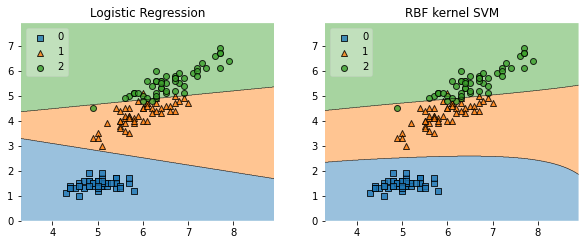

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)
clf2 = SVC(random_state=0, probability=True)


# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
               'RBF kernel SVM']
         
for clf, lab, grd in zip([clf1, clf2],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)
